In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

### Ainda no DataSet Iris...

In [3]:
# Ajusta do DataFrame
df = pd.read_csv(
    'iris_data.csv',
    sep=';',
    decimal=',',
    names=[
        'sepal_len_cm',
        'sepal_wid_cm',
        'petal_len_cm',
        'petal_wid_cm',
        'type'
    ]
)
df

,sepal_len_cm,sepal_wid_cm,petal_len_cm,petal_wid_cm,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Descreve o DataFrame
df.describe()

,sepal_len_cm,sepal_wid_cm,petal_len_cm,petal_wid_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Adiciona outliers para teste de média e mediana
list_vals = list(df['sepal_len_cm']) + [200, 300, 500]
np.mean(list_vals), np.median(list_vals)

(12.264705882352942, 5.8)

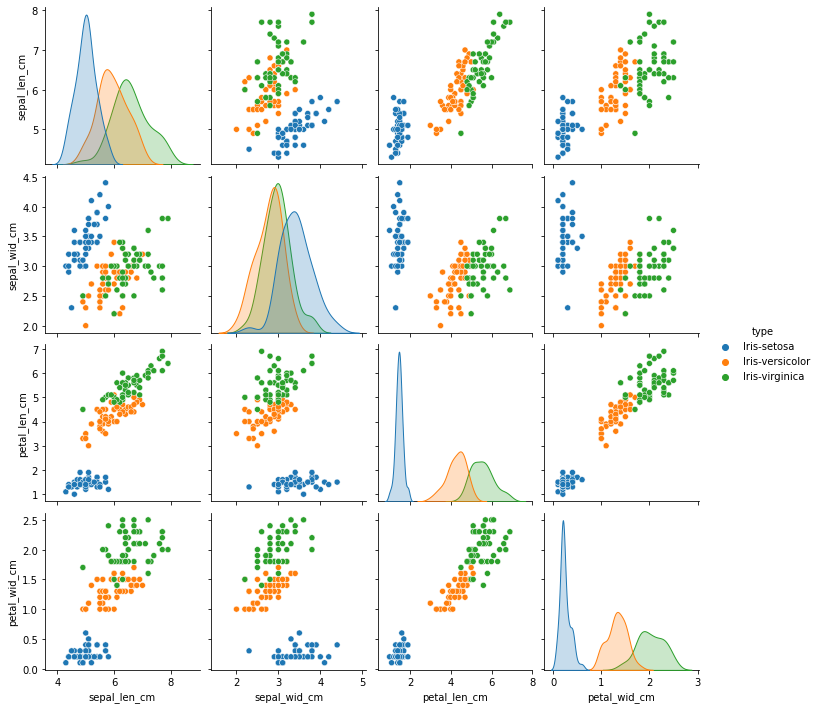

In [13]:
# PairPlot
sns.pairplot(df, hue='type')

### Exemplos de covariância e correlação

In [56]:
# Cria um DataFrame relacionando x a funções
x_vals = np.arange(0, 100, 0.1)
df_cov = pd.DataFrame({
    'x'       : x_vals,
    'y_2x'    : x_vals * 2,
    'y_3x'    : x_vals * 3,
    'y_xx'    : x_vals ** 2,
    'y_exp_x' : np.exp(x_vals),
    'y_sin_x' : np.sin(x_vals),
    'y_m_2x'  : x_vals * -2,
    'y_rand'  : np.random.normal(size=len(x_vals))
})
df_cov

,x,y_2x,y_3x,y_xx,y_exp_x,y_sin_x,y_m_2x,y_rand
0,0.0,0.0,0.0,0.00,1.000000e+00,0.000000,-0.0,-0.110437
1,0.1,0.2,0.3,0.01,1.105171e+00,0.099833,-0.2,-0.608502
2,0.2,0.4,0.6,0.04,1.221403e+00,0.198669,-0.4,0.388439
3,0.3,0.6,0.9,0.09,1.349859e+00,0.295520,-0.6,0.065120
4,0.4,0.8,1.2,0.16,1.491825e+00,0.389418,-0.8,1.113433
...,...,...,...,...,...,...,...,...
995,99.5,199.0,298.5,9900.25,1.630425e+43,-0.857795,-199.0,-0.389344
996,99.6,199.2,298.8,9920.16,1.801899e+43,-0.802196,-199.2,1.590822
997,99.7,199.4,299.1,9940.09,1.991406e+43,-0.738582,-199.4,-0.314671
998,99.8,199.6,299.4,9960.04,2.200844e+43,-0.667588,-199.6,-0.669559


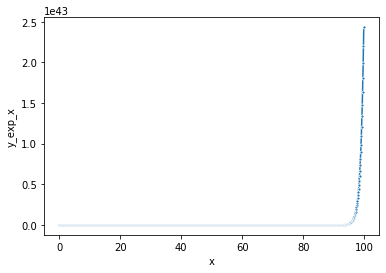

In [62]:
# LinearPlot
sns.lineplot(data=df_cov, x='x', y='y_exp_x', marker='.')

In [58]:
# Covariância
df_cov.cov()

,x,y_2x,y_3x,y_xx,y_exp_x,y_sin_x,y_m_2x,y_rand
x,8.341667e+02,1.668333e+03,2.502500e+03,8.333325e+04,1.253648e+43,-9.236343e-01,-1.668333e+03,-1.035790e+00
y_2x,1.668333e+03,3.336667e+03,5.005000e+03,1.666665e+05,2.507297e+43,-1.847269e+00,-3.336667e+03,-2.071580e+00
y_3x,2.502500e+03,5.005000e+03,7.507500e+03,2.499998e+05,3.760945e+43,-2.770903e+00,-5.005000e+03,-3.107369e+00
y_xx,8.333325e+04,1.666665e+05,2.499998e+05,8.881101e+06,1.653719e+45,-9.015602e+01,-1.666665e+05,-9.734612e+01
y_exp_x,1.253648e+43,2.507297e+43,3.760945e+43,1.653719e+45,3.201596e+84,-1.776677e+41,-2.507297e+43,-3.025717e+40
y_sin_x,-9.236343e-01,-1.847269e+00,-2.770903e+00,-9.015602e+01,-1.776677e+41,5.025477e-01,1.847269e+00,3.076524e-02
y_m_2x,-1.668333e+03,-3.336667e+03,-5.005000e+03,-1.666665e+05,-2.507297e+43,1.847269e+00,3.336667e+03,2.071580e+00
y_rand,-1.035790e+00,-2.071580e+00,-3.107369e+00,-9.734612e+01,-3.025717e+40,3.076524e-02,2.071580e+00,1.035492e+00


In [59]:
# Correlação de Pearson (Linear)
df_cov.corr(method='pearson') # Correlação forte -> | corr | > 0.7

,x,y_2x,y_3x,y_xx,y_exp_x,y_sin_x,y_m_2x,y_rand
x,1.000000,1.000000,1.000000,0.968185,0.242586,-0.045111,-1.000000,-0.035243
y_2x,1.000000,1.000000,1.000000,0.968185,0.242586,-0.045111,-1.000000,-0.035243
y_3x,1.000000,1.000000,1.000000,0.968185,0.242586,-0.045111,-1.000000,-0.035243
y_xx,0.968185,0.968185,0.968185,1.000000,0.310131,-0.042675,-0.968185,-0.032101
y_exp_x,0.242586,0.242586,0.242586,0.310131,1.000000,-0.140067,-0.242586,-0.016618
y_sin_x,-0.045111,-0.045111,-0.045111,-0.042675,-0.140067,1.000000,0.045111,0.042648
y_m_2x,-1.000000,-1.000000,-1.000000,-0.968185,-0.242586,0.045111,1.000000,0.035243
y_rand,-0.035243,-0.035243,-0.035243,-0.032101,-0.016618,0.042648,0.035243,1.000000


In [64]:
# Cria um DF de exemplo
df_rank = pd.DataFrame({
    'var1' : [1,2,3,4,5],
    'var2' : [1,4,9,16,25] 
})
df_rank.corr()

,var1,var2
var1,1.000000,0.981105
var2,0.981105,1.000000


In [66]:
# Organiza o DF de acordo com a posição no ranking
df_rank['rank_var1'] = np.argsort(df_rank['var1'])
df_rank['rank_var2'] = np.argsort(df_rank['var2'])
df_rank.corr()

,var1,var2,rank_var1,rank_var2
var1,1.000000,0.981105,1.000000,1.000000
var2,0.981105,1.000000,0.981105,0.981105
rank_var1,1.000000,0.981105,1.000000,1.000000
rank_var2,1.000000,0.981105,1.000000,1.000000


In [68]:
# Correlação de Spearman (Ranking)
df_cov.corr(method='spearman')

,x,y_2x,y_3x,y_xx,y_exp_x,y_sin_x,y_m_2x,y_rand
x,1.000000,1.000000,1.000000,1.000000,1.000000,-0.043964,-1.000000,-0.048179
y_2x,1.000000,1.000000,1.000000,1.000000,1.000000,-0.043964,-1.000000,-0.048179
y_3x,1.000000,1.000000,1.000000,1.000000,1.000000,-0.043964,-1.000000,-0.048179
y_xx,1.000000,1.000000,1.000000,1.000000,1.000000,-0.043964,-1.000000,-0.048179
y_exp_x,1.000000,1.000000,1.000000,1.000000,1.000000,-0.043964,-1.000000,-0.048179
y_sin_x,-0.043964,-0.043964,-0.043964,-0.043964,-0.043964,1.000000,0.043964,0.037411
y_m_2x,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.043964,1.000000,0.048179
y_rand,-0.048179,-0.048179,-0.048179,-0.048179,-0.048179,0.037411,0.048179,1.000000
